# Summary
This project investigates which variables from the Framingham Heart Study dataset are the most significant predictors of a 10-year risk of coronary heart disease (CHD). Utilizing data collected in the 1950s by the Framingham Heart Study, we cleaned the dataset by dropping all missing records, a method that yielded the best model results compared to other cleaning techniques discussed further in the report and its appendix. The project contains a decision tree model and a linear regression model to predict the onset of coronary heart disease and compares the performance of each of these models on their ability to accurately predict the onset of a 10 year risk of coronary heart disease. Both models also contain visualizations to help assess the accuracy of the values on the testing dataset.

Comparative analysis revealed that the linear regression model performed better, demonstrating higher accuracy in predicting 10-year CHD risk. However, the decision tree model was important in identifying the key predictors of CHD. The most critical factors found to influence the risk include age, systolic blood pressure, and total cholesterol levels. These findings underscore the significance of these variables in the development of CHD over a ten-year period. Further explanation of these variable results and model accuracy can be found below in each respective model’s section.



# Data

The Framingham Heart Study is one of the most significant longitudinal studies in medical history, initiated in 1948 in Framingham, Massachusetts, USA. It aimed to identify the common factors or characteristics that contribute to coronary heart disease by following its development over a 20 year period in a large group of participants. The study identified several major risk factors for cardiovascular disease, including high blood pressure, high cholesterol levels, smoking, obesity, diabetes, and physical inactivity.

The main question we wanted to answer was: what variables in the dataset are the greatest predictors to onset a 10 year risk of coronary heart disease in a patient? We chose to make a decision tree and linear regression model to try to answer our question.

## Data Cleaning / Analysis Preparation

We explored various methods for data cleaning/preparing for analysis, including mean and median imputation techniques. However, our analysis revealed that the outcomes did not substantially diverge from those obtained by simply eliminating the missing values. Notably, the decision tree yielded the best outcome when NA values were dropped (no imputation), while linear regression exhibited only marginal improvement with median imputation. Thus, we opted to concentrate solely on this approach for our modeling.

For data cleaning, we decided to drop rows with missing values from the training and test sets. There were 436 rows in the training data frame that had at least one missing value and 146 rows in the testing data that had at least one missing value. In terms of specific variables, the ‘glucose’ variable had the most missing entries with 285 NA values in the training data and 103 NA values in the testing data. Glucose is correlated with diabetes, so by dropping those, that may have an impact on our final results.

After cleaning the data and analyzing our training/testing sets, we picked out eight promising variables to use in our project to answer our research question and predict CHD likelihood. The relevant variables used to predict our target variable tenYearCHD are age, sex, sysBP, diaBP, totalChol, BMI, cigsPerDay, and glucose.

## Relevant Variables

- **age**: The 'age' variable is a fundamental variable in the Framingham Study dataset, representing the age of participants at different time points. Tracking age allows researchers to understand how cardiovascular risk factors evolve over the lifespan and how they contribute to the development of CHD at different stages of life. When conducting the experiment, the researchers chose participants in the age range of 30-59.

- **sysBP** (Systolic Blood Pressure): The variable sysBP represents the maximum pressure in the arteries during the heart's contraction phase (systole), indicating the force of blood being pumped from the heart. Elevated SBP is a key risk factor for cardiovascular diseases like heart attacks and strokes. The systolic blood pressure of each participant is measured in mmHg. The systolic blood pressure of each participant is measured in mmHg.

- **diaBP** (Diastolic Blood Pressure): The variable diaBP reflects the minimum pressure in the arteries during the heart's relaxation phase (diastole), indicating the pressure when the heart is at rest between beats. Elevated DBP can signal increased vascular resistance and stiffness, contributing to hypertension and cardiovascular disease. The diastolic blood pressure of each participant is measured in mmHg.

- **totalChol** (Total Cholesterol): The total cholesterol, measured in mg/dL plays a crucial role in cardiovascular health, with elevated levels of total cholesterol linked to an increased risk of atherosclerosis and coronary artery disease. By monitoring participants' total cholesterol levels, the Framingham Study contributes to our understanding of lipid metabolism and the relationship between cholesterol levels and cardiovascular outcomes.

- **sex**: Gender differences in cardiovascular risk have long been recognized, with men typically experiencing higher rates of cardiovascular diseases at younger ages, while women's risk increases following menopause. A value of 1 denotes male and a value of 0 denotes female in the dataset.

- **glucose**: The blood glucose level (mg/dL) of each participant is measured and recorded in the dataset. Glucose levels are indicative of glycemic control and are closely linked to the development of type 2 diabetes mellitus, a major risk factor for cardiovascular disease. Elevated fasting glucose levels, as observed in prediabetes and diabetes, contribute to endothelial dysfunction, oxidative stress, and inflammation, promoting atherosclerosis and cardiovascular complications.

- **BMI**: BMI is a measure of body fat based on an individual's weight and height and serves as a proxy for assessing overall fitness and can measure obesity which is a significant risk factor for cardiovascular disease, predisposing individuals to conditions such as hypertension, dyslipidemia, and type 2 diabetes.

- **cigsPerDay**:  This variable represents the number of cigarettes smoked per day by an individual participant in the study. Smoking is a well-established risk factor for cardiovascular diseases such as coronary heart disease and stroke. The variable quantifies the frequency of smoking behavior among participants, providing valuable insights into the relationship between cigarette consumption and cardiovascular health outcomes as higher values of cigsPerDay indicate heavier smoking habits, which are associated with an increased risk of developing smoking-related diseases.

- **tenYearCHD**:  The Ten-Year CHD score is a calculated variable from the study that estimates an individual's likelihood of experiencing a coronary event (such as myocardial infarction or coronary death) within the next ten years based on various risk factors in the dataset. This binary variable serves as a risk indicator with 0 representing a lower predicted risk for CHD and 1 representing a higher predicted risk of developing coronary heart disease within the next 10 years.

# Results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

# start from reading in the cleaned data
drop_train_df = pd.read_csv("./fhs_clean_train.csv")
drop_test_df = pd.read_csv("./fhs_clean_test.csv")

# create the training and testing splits
xtrain = drop_train_df.drop("TenYearCHD", axis=1)
xtest = drop_test_df.drop("TenYearCHD", axis=1)
ytrain = drop_train_df["TenYearCHD"]
ytest = drop_test_df["TenYearCHD"]
ntest = len(ytest)
tss = np.sum((ytest - ytrain.mean()) ** 2)

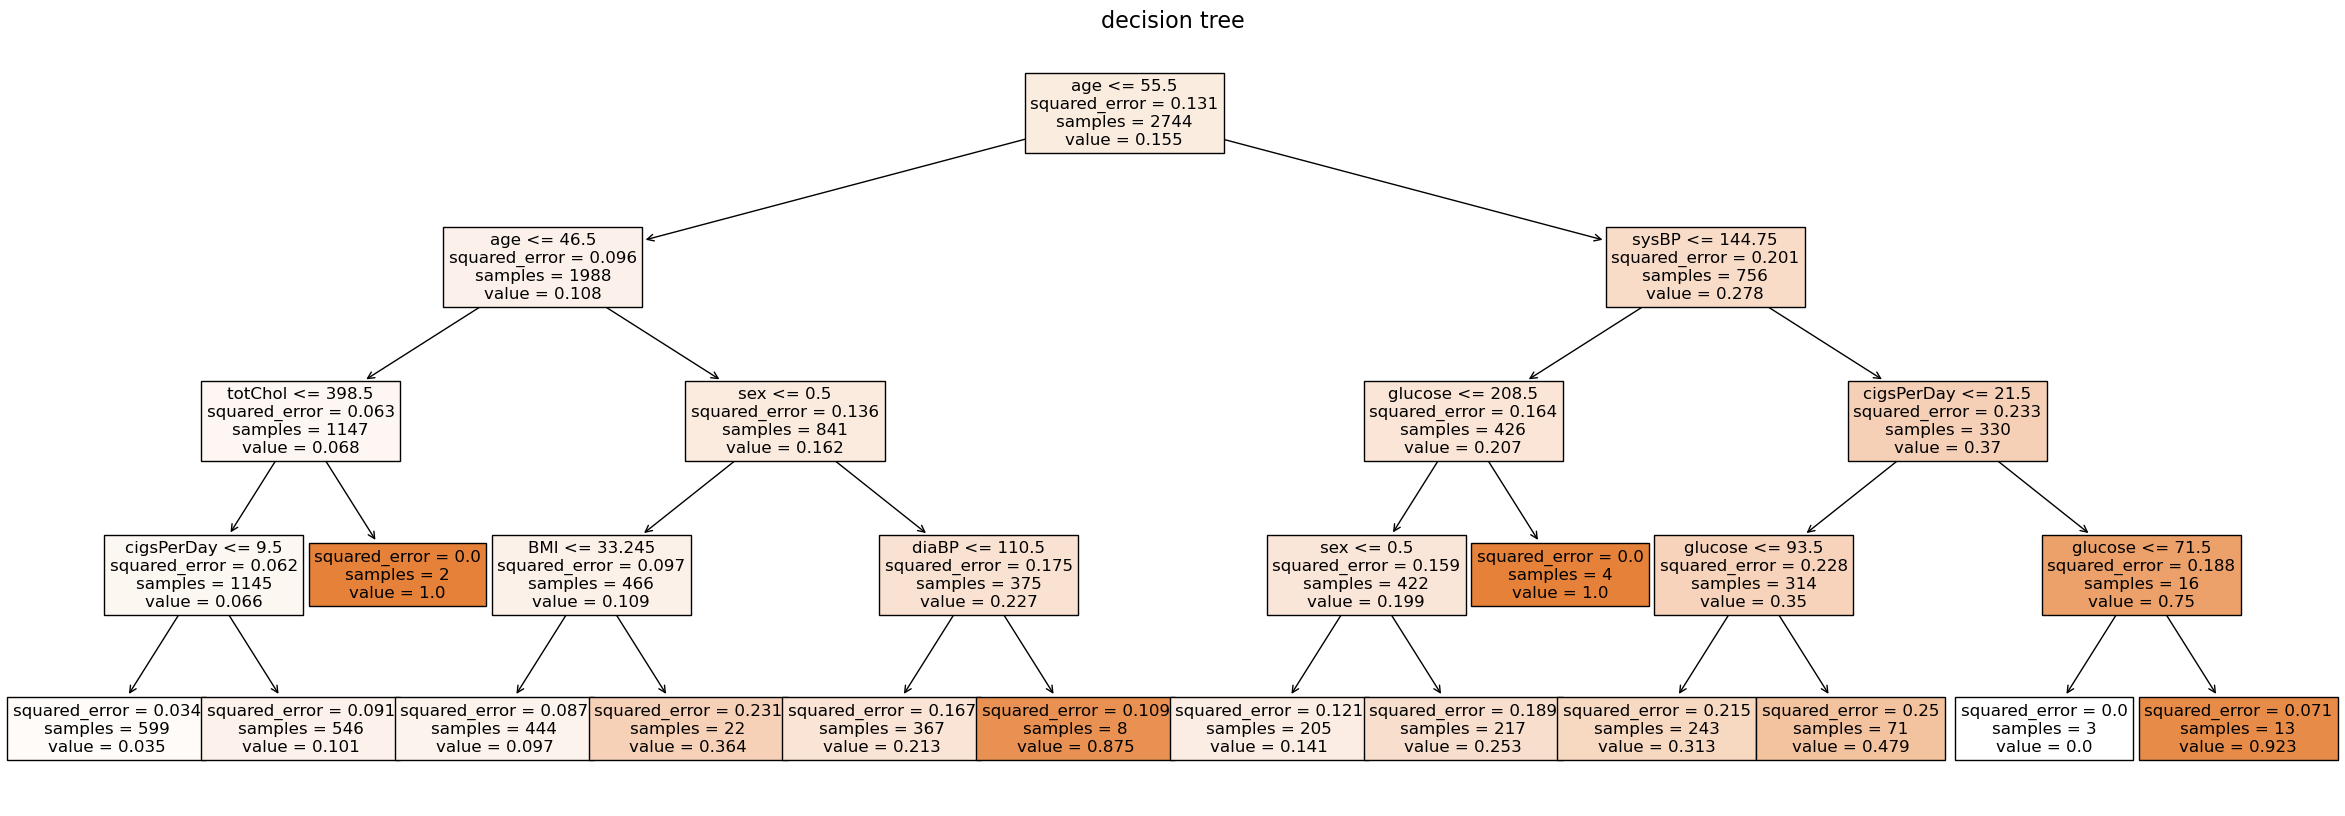

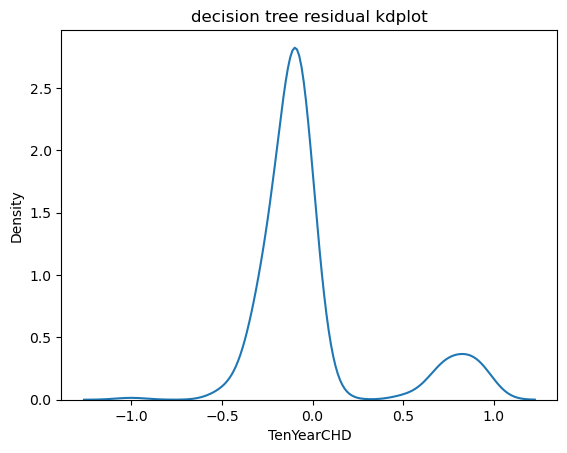

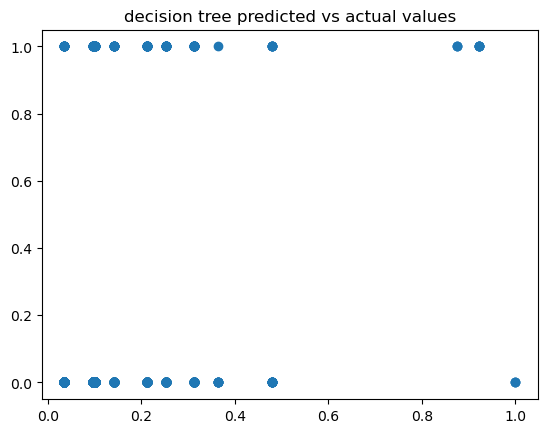

In [ ]:
# tree approach:

cart = DecisionTreeRegressor(max_depth=4).fit(xtrain, ytrain)
varnames = list(cart.feature_names_in_)

#adjusting the tree plot size so its easier to see
plt.figure(figsize=(30, 10)) #adjust these nums
plot_tree(cart, filled=True, feature_names=varnames, fontsize=12)
plt.title("decision tree", fontsize=16)
plt.savefig("./tree.png", dpi=500)
plt.show()

yhat_tree = cart.predict(xtest)
residual = ytest - yhat_tree
sns.kdeplot(residual).set_title("decision tree residual kdplot")
plt.show()

plt.scatter(x=yhat_tree, y=ytest)
plt.title("decision tree predicted vs actual values")
plt.show()

sse_tree = np.sum((ytest - yhat_tree) ** 2)
mse_tree = sse_tree / ntest
rmse_tree = np.sqrt(sse_tree / ntest)
r2_tree = 1 - sse_tree / tss

The first split is on age, which suggests that age is a significant factor in predicting the likelihood of coronary heart disease (CHD). Specifically, it distinguishes between individuals who are 46.5 years and younger versus older. After age, total cholesterol (totChol) and systolic blood pressure (sysBP) are the next most important features that split the data. This makes sense as both cholesterol levels and blood pressure are important indicators of heart health in the medical field.
 
The residual kplot shows that the model is not capturing all of the complexities in the data, but it is still performing relatively well. The residuals do peak around 0.0 which is good, but the smaller residual peak between 0.5 and 1.0 indicate that the decision tree model is not capturing all of the complexities of the dataset. Analyzing the predicted vs actual values plot of the decision tree shows that the model is not accurately predicting results as the points should be clustered around (0.0, 0.0) and (1.0,1.0). Seen in the plot, the model does not correctly predict any positive values of 10 year CHD, but it does correctly predict some negatives. A lot of the positive values are incorrectly predicted to be negative.



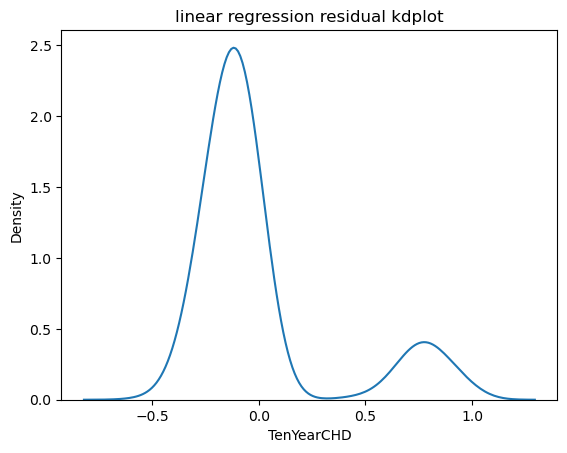

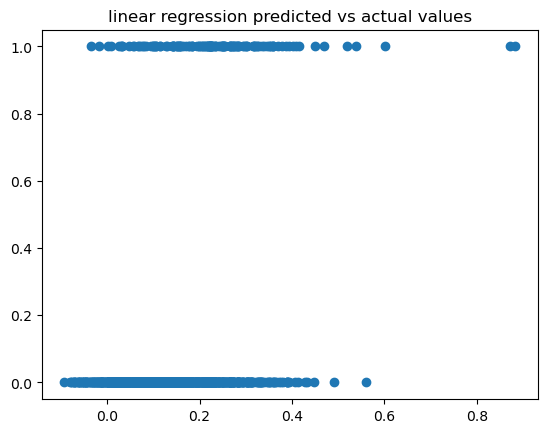

In [ ]:
# linear regression approach:
reg = LinearRegression().fit(xtrain, ytrain)
yhat_lr = reg.predict(xtest)
residual = ytest - yhat_lr
sns.kdeplot(residual).set_title("linear regression residual kdplot")
plt.show()

plt.scatter(x=yhat_lr, y=ytest)
plt.title("linear regression predicted vs actual values")
plt.show()

sse_lr = np.sum((ytest - yhat_lr) ** 2)
mse_lr = sse_lr / ntest
rmse_lr = np.sqrt(sse_lr / ntest)
r2_lr = 1 - sse_lr / tss

For the linear regression residual plot, it is very similar to the decision tree model’s plot. The largest residual peak is around 0.0 which is good but again there is a smaller peak in the same value ranges between 0.5 and 1.0. This indicates that there might be an issue with the dataset which we further explored in the conclusion. For the predicted vs actual values a similar case can be found where the model correctly predicts more cases of true negatives and it outputs many false negative cases. There are a couple of values where the model correctly predicts a true positive and it has 0 cases of false positives. 

In [ ]:
# comparison table:

cdf = pd.DataFrame({"SSE": [sse_tree, sse_lr], "MSE": [mse_tree, mse_lr], "RMSE": [rmse_tree, rmse_lr], "R2": [r2_tree, r2_lr]})
cdf.index = ['TREE', 'LR']
cdf.head()

,SSE,MSE,RMSE,R2
TREE,105.868932,0.115830,0.340339,0.069044
LR,103.200909,0.112911,0.336023,0.092506


# Conclusion

## Comparison of different models
In general, lower values of SSE, MSE and RMSE are more desirable since they indicate better predictive accuracy, while higher values of R^2 imply a better fit of the model to the data.

Based on the results we got, the LR model has the lowest SSE, MSE and RMSE, and it also has the highest R^2, suggesting LR can be the comparable best model in these three (indicating better predictive accuracy and better explanation in a larger proportion of the variance in the target variable).

Besides, we also tried to impute medians/means into dataset considering there were a lot of null values. Surprisingly, the cleaning process didn't enhance any of the models, except for linear regression, which showed only a slight improvement with median imputation on the variables we addressed. This rough attempt can be seen on the `dataCleaning` branch.

Interestingly, the decision tree model's performance notably deteriorated with imputation compared to simply dropping all N/A values.

Considering the results did not improve clearly and imputing did not always make things more accurate, we decided to use our first version of cleaning dataset without imputing median/mean values.

## Data Limitation
### Missing data and Non-response bias

* The total drawn sample was 6,537. In the end, only 4,494 or 68.8 per cent of the drawn sample came to the study clinic for examination in spite of many and varied appealed to nonrespondents

* Researchers noticed that citizens who delined to participate in the study were more likely to be morribound or bedridden: the mortality rate for nonrespondents during the first few years when examinations were being held were more than double of the participants of the study. Nonrespondents were also more likely to move out of town and more likely to differ in socioeconomic status on average compared to respondents.

* Sometimes, people prefer not to present some specific type of data, especially those who got some illness prefer not to release their health issue data. Also, physical death of people also led to non-response. Non-response bias affects the data result, undermining the validity and generalizability of study findings. Sometimes, it is also linked to survivorship bias.

### Sampling bias/ Lack of population diversity

* According to the study background, the study team tried a lot to reduce self-selection bias or sampling bias. However, because of cost, effectiveness and maneuverability, the study focused on people between 30-59 years old (age at the sampling selection, the study lasted for about 20 years)in only one town.

* The researchers also decided to include families of participants, meaning that invitations to join the study were sent out to all eligible members for each family they reached. This could have some influence on the final results based on genetics, but this is not analyzable due to the anonyminitiy of the data.

* Geographic coverage inherently constrains the extent to which we can draw general conclusions. It is plausible that certain communities within the United States markedly diverge from the norm concerning arteriosclerosis and hypertension. In addtition, within the white race in the U.S., the variability in arteriosclerosis and hypertension distribution within communities likely surpasses that between communities. Thus, a diverse array of circumstances influencing the onset of these diseases may exist within any given community. This variability may significantly impact the accuracy and generality of our models, as they must adequately account for the diverse factors influencing disease development across different communities and populations.

## Research strategy evaluation and possible improvements

* The strategy of this study/research can be improved and developed
Considering about the current techniques and financial/academic support, this study could be redone within a more diversified population with a bigger sample, a larger age gap, more races, more ethics, more geographic backgrounds.
 - The collection of data can be easier and more efficient and updated through using updated techniques without making people feel worried about info privacy. It is reasonable to think about some of the non-responses led by the unwillingness about possible privacy leak, especially about someone’s healthiness.

  - Ideally, it would be best to not include multiple members from a single family to rule out confounding variables of genetic influence

 - The study teams can try to engage with more communities in different locations to have an extension of geographic.

 - Keep continuously tracking participants in a longer period helps to offer more insightful views of long-term effects.

 - Intentionally select samples with more races/ethics so that we can increase our generality of conclusion.

 - Try to motivate males to participate since males were less likely to participate or willing to release their data compared to females in the Framingham Heart Study.

## Final Comments
It is noted that some of the biggest predictors of CHD are exercise, diet, depression, and alcohol consumption, none of which were avabilable in the provided data. These missing factors might explain why the highest R^2 value does not even reach 0.1. Additionally, it is well known that BMI is a rather misleading statistic and is not the best measurement of obesity, another very important predictor of CHD. Even something as simple as waist-to-heigh ration is a more accurate measurement of obesity, so using an outdated predictor of BMI could also explain why the models are very bad predictors of the actual data. As seen above, the residuals for both models are very similar, which indicates that poor model performace lies in the original data itself and not our regression methods. One key piece of information missing is how patients were treated after the initial examination. Did they go on to seek medical help and start taking preventative medications? Did they change their diet and start exercising regularly? Did they receive surgery? None of this information is present in the data, which shows that trying to predict CHD in ten years from a single preliminary examination is an extremely far-fetched idea and does not work well in the real world.

# APPENDIX

### Optional Code

The code below can be used to optimized the training and testing data sets by restricting variables to those chosen by the tree. The first two lines of this code cell are to make sure that all outputs are surpressed as this is a demonstration-only cell.

In [ ]:
%%capture --no-display
%%script echo skipping

select_drop_train_df = drop_train_df[["sex", "age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "glucose", "TenYearCHD"]]
select_drop_test_df = drop_test_df[["sex", "age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "glucose", "TenYearCHD"]]
xtrain = select_drop_train_df.drop("TenYearCHD", axis=1)
ytrain = select_drop_train_df["TenYearCHD"]
xtest = select_drop_test_df.drop("TenYearCHD", axis=1)
ytest = select_drop_test_df["TenYearCHD"]

### Decision Tree Classifier

This is an equivalent tree regression approach which produces a confusion matrix instead of a residual plot. Some may find this matrix to be more intuitive and understandable, which is why we included this approach in the appendix.

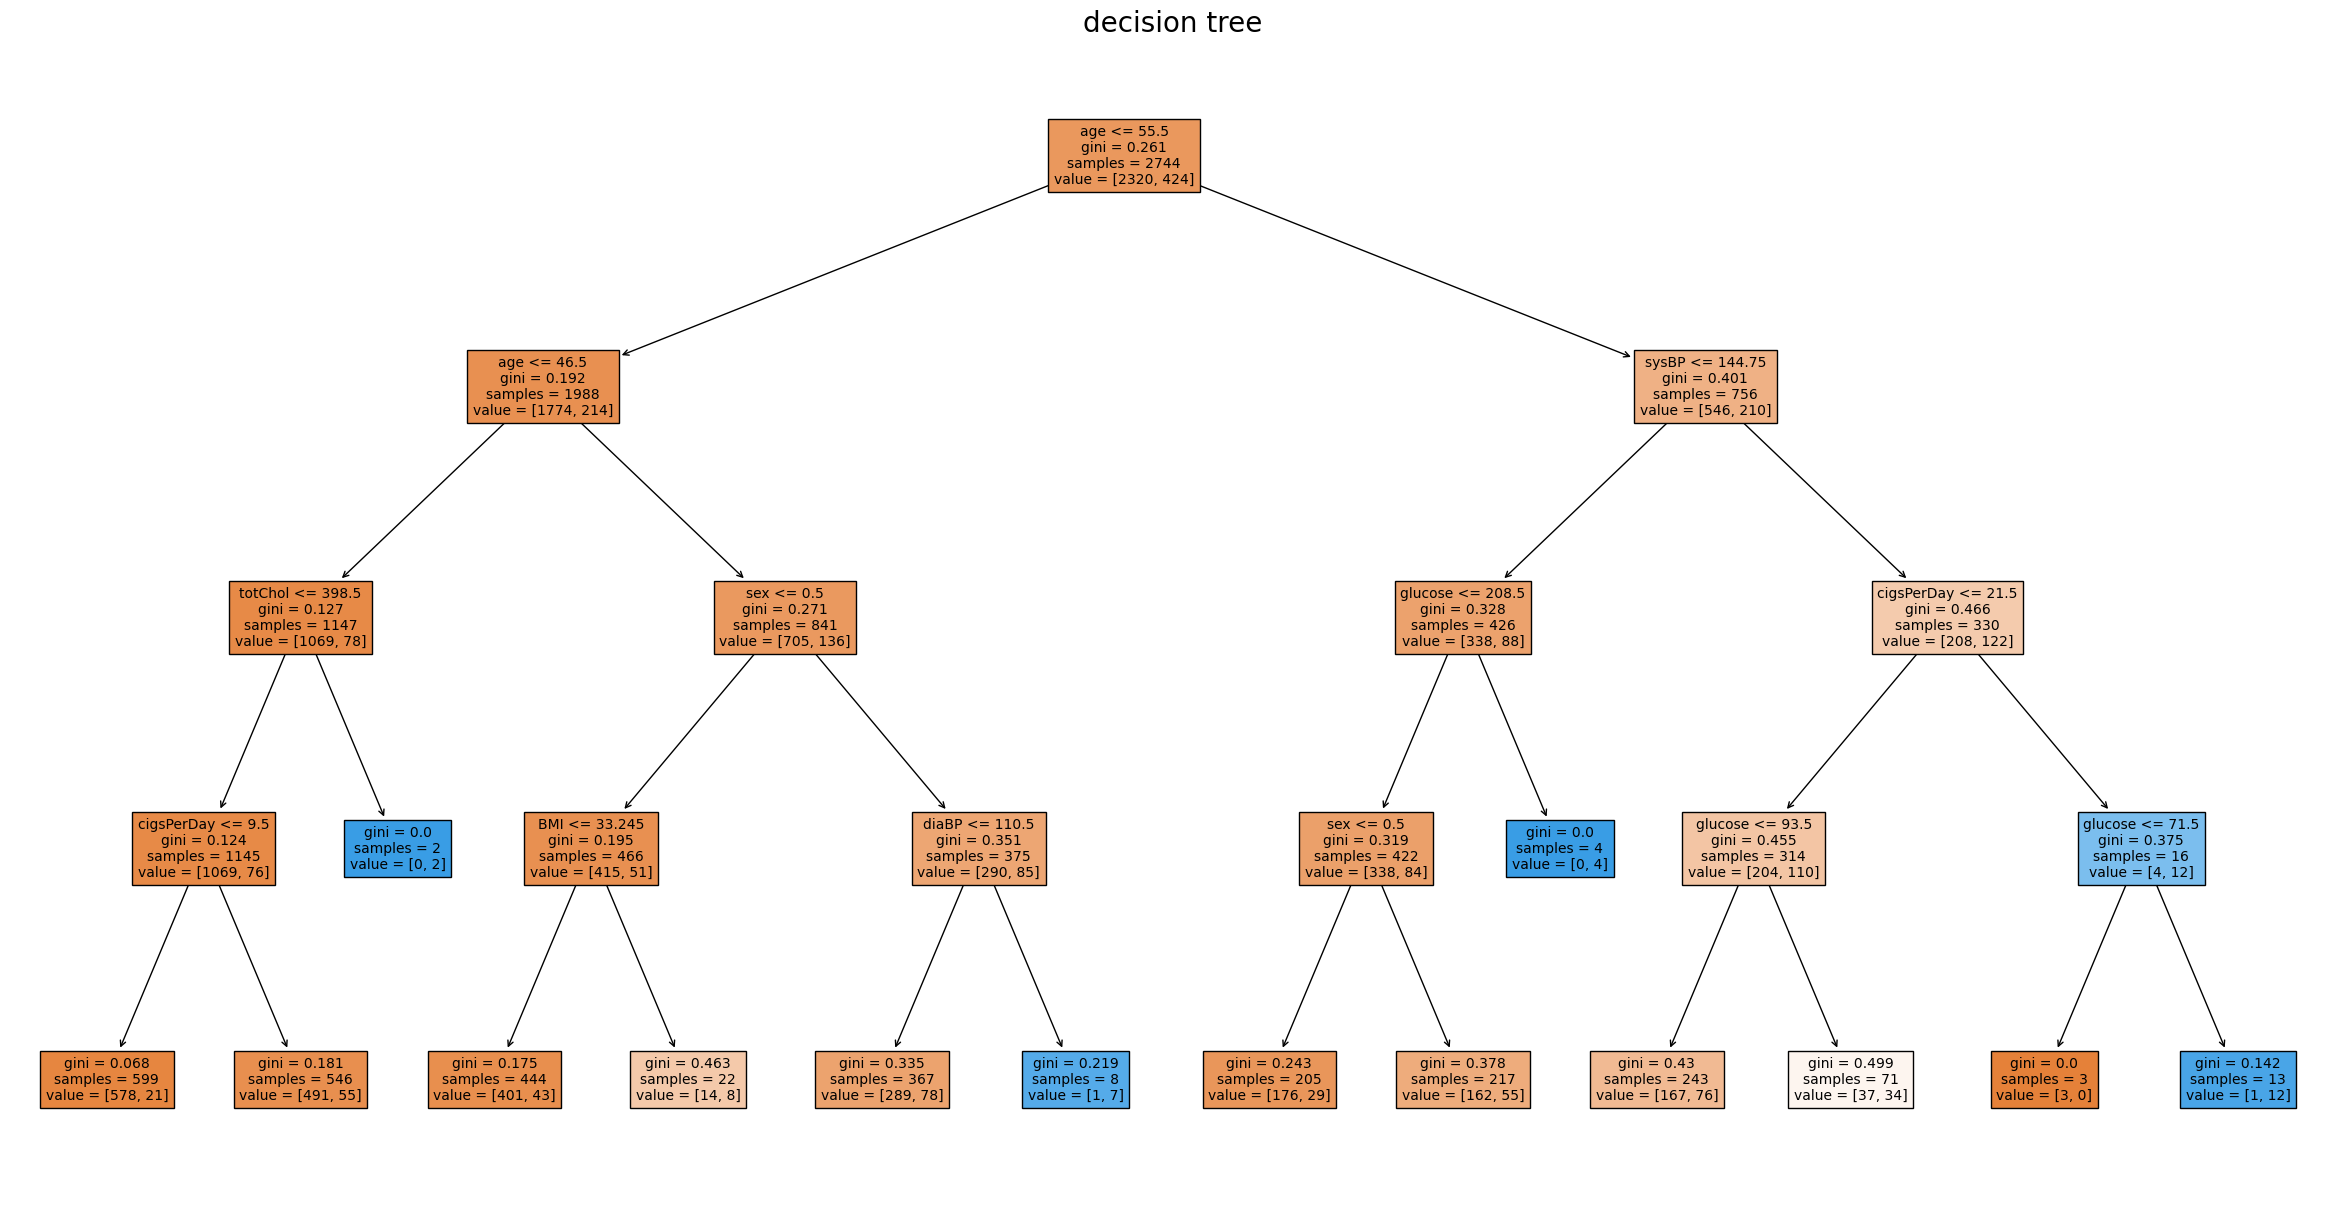

Accuracy of Decision Tree Classifier: 0.8610503282275711
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       781
           1       0.75      0.07      0.12       133

    accuracy                           0.86       914
   macro avg       0.81      0.53      0.52       914
weighted avg       0.85      0.86      0.81       914

Confusion Matrix:
 [[778   3]
 [124   9]]


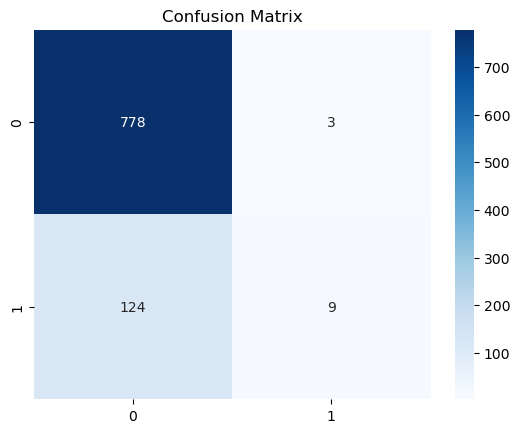

In [11]:
#decision tree but using classifier instead of regressor and confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cart = DecisionTreeClassifier(max_depth=4).fit(xtrain, ytrain)
varnames = list(xtrain.columns)  # Make sure xtrain is a DataFrame to use this line


plt.figure(figsize=(30, 15))#increase figure size
plot_tree(cart, filled=True, feature_names=varnames, fontsize=10)
plt.title("decision tree", fontsize=20)
plt.savefig("./tree_classifier.png", dpi=500) 
plt.show()

#accuracy and report
yhat_tree = cart.predict(xtest)
accuracy_tree = accuracy_score(ytest, yhat_tree)
report_tree = classification_report(ytest, yhat_tree)

#confusion matrix to analyze error
conf_matrix_tree = confusion_matrix(ytest, yhat_tree)

print("Accuracy of Decision Tree Classifier:", accuracy_tree)
print("Classification Report:\n", report_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

#confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
